In [148]:
# Import packages that will be utilized during this process
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [149]:
# Remove pandas duplication of the first column within the file
df = pd.read_csv('./churn_clean.csv', index_col=0)

In [150]:
# View data types and column information, dataframe as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [151]:
# Get summary statistics of the dataset with datatype int64
print(df.describe())

                Zip           Lat           Lng     Population    Children  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.0000   
mean   49153.319600     38.757567    -90.782536    9756.562400      2.0877   
std    27532.196108      5.437389     15.156142   14432.698671      2.1472   
min      601.000000     17.966120   -171.688150       0.000000      0.0000   
25%    26292.500000     35.341828    -97.082812     738.000000      0.0000   
50%    48869.500000     39.395800    -87.918800    2910.500000      1.0000   
75%    71866.500000     42.106908    -80.088745   13168.000000      3.0000   
max    99929.000000     70.640660    -65.667850  111850.000000     10.0000   

                Age         Income  Outage_sec_perweek         Email  \
count  10000.000000   10000.000000        10000.000000  10000.000000   
mean      53.078400   39806.926771           10.001848     12.016000   
std       20.698882   28199.916702            2.976019      3.025898   
min      

In [152]:
# View data counts to ensure appropriate values for Timezone
df.TimeZone.value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: TimeZone, dtype: in

In [153]:
# View data counts to ensure appropriate values for Gender
df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [154]:
# Check for missing values
print(df.isnull().sum())

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [155]:
# Check for duplicates
duplicates = df.duplicated(keep=False)
duplicate_rows = df[duplicates]
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [156]:
# Rename the caseorder column for proper spacing
df = df.rename(columns={'Caseorder': 'Case_order'})

In [157]:
# Rename the outage_sec_perweek column for proper spacing
df = df.rename(columns={'Outage_sec_perweek': 'Outage_sec_per_week'})

In [158]:
# Rename the onlinesecurity column for proper spacing
df = df.rename(columns={'Onlinesecurity': 'Online_security'})

In [159]:
# Rename the internetservice column for proper spacing
df = df.rename(columns={'Internetservice': 'Internet_service'})

In [160]:
# Rename the onlinebackup column for proper spacing
df = df.rename(columns={'Onlinebackup': 'Online_backup'})

In [161]:
# Rename the deviceprotection column for proper spacing
df = df.rename(columns={'Deviceprotection': 'Device_protection'})

In [162]:
# Rename the techsupport column for proper spacing
df = df.rename(columns={'Techsupport': 'Tech_support'})

In [163]:
# Rename the streamingtv column for proper spacing
df = df.rename(columns={'Streamingtv': 'Streaming_tv'})

In [164]:
# Rename the streamingmovies column for proper spacing
df = df.rename(columns={'Streamingmovies': 'Streaming_movies'})

In [165]:
# Rename the paperlessbilling column for proper spacing
df = df.rename(columns={'Paperlessbilling': 'Paperless_billing'})

In [166]:
# Rename the paymentmethod column for proper spacing
df = df.rename(columns={'Paymentmethod': 'Payment_method'})

In [167]:
# Rename the monthlycharge column for proper spacing
df = df.rename(columns={'Monthlycharge': 'Monthly_charge'})

In [168]:
# Replace location based timezone values with time-zone specific values
df.TimeZone.replace({
    # Change all Pacific cities to PDT - Pacific Daylight Time
    "America/Los_Angeles": "PDT - Pacific Daylight Time",
    # Change all Alaskan cities to AT - Alaskan Time
    "America/Anchorage": "AT - Alaskan Time",
    "America/Nome": "AT - Alaskan Time",
    "America/Sitka": "AT - Alaskan Time",
    "America/Juneau": "AT - Alaskan Time",
    # Change all Mountain Standard cities to MST - Mountain Standard Time
    "America/Denver": "MST - Mountain Standard Time",
    "America/Phoenix": "MST - Mountain Standard Time",
    "America/Boise": "MST - Mountain Standard Time",
    # Change all Central cities to CDT - Central Daylight Time
    "America/Chicago": "CDT - Central Daylight Time",
    "America/Menominee": "CDT - Central Daylight Time",
    "America/Indiana/Tell_City": "CDT - Central Daylight Time",
    "America/North_Dakota/New_Salem": "CDT - Central Daylight Time",
    "America/Indiana/Knox": "CDT - Central Daylight Time",
    "America/Ojinaga": "CDT - Central Daylight Time",
    # Change all Eastern cities to EDT - Eastern Daylight Time
    "America/New_York": "EDT - Eastern Daylight Time",
    "America/Detroit": "EDT - Eastern Daylight Time",
    "America/Indiana/Indianapolis": "EDT - Eastern Daylight Time",
    "America/Kentucky/Louisville": "EDT - Eastern Daylight Time",
    "America/Indiana/Vincennes": "EDT - Eastern Daylight Time",
    "America/Toronto": "EDT - Eastern Daylight Time",
    "America/Indiana/Winamac": "EDT - Eastern Daylight Time",
    "America/Indiana/Marengo": "EDT - Eastern Daylight Time",
    "America/Indiana/Petersburg": "EDT - Eastern Daylight Time",
    # Change Puerto Rico to AST - Atlantic Standard Time
    "America/Puerto_Rico": "AST - Atlantic Standard Time",
    # Change Hawaii to HST - Hawaii Aleutian Time
    "Pacific/Honolulu": "HST - Hawaii Aleutian Time"
}, inplace=True)

In [169]:
# Fix minimum zip codes by converting column to string from int64, then front-fill with zeros to fill
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

In [170]:
# Map Churn values to boolean
df["Churn"] = df["Churn"].map({"Yes": True, "No": False})

In [171]:
# Convert Churn column to boolean from object
df["Churn"] = df["Churn"].astype("boolean")

In [172]:
# Map Techie values to boolean
df["Techie"] = df["Techie"].map({"Yes": True, "No": False})

In [173]:
# Convert Techie column to boolean from object
df["Techie"] = df["Techie"].astype("boolean")

In [174]:
# Create a contingency table for the Techie and Churn variables
c_table = pd.crosstab(df.Churn, df.Techie) 

In [175]:
# Print the table that was created
print(c_table)

Techie  False  True 
Churn               
False    6226   1124
True     2095    555


In [176]:
# Perform the chi-square test
chi2, p_value, dof, _ = chi2_contingency(c_table)

In [140]:
# Get the chi-square stat, p-value and the degrees of freedom
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Chi-square statistic: 44.11479393861451
P-value: 3.096716355509661e-11
Degrees of Freedom: 1


Text(0, 0.5, 'Frequency')

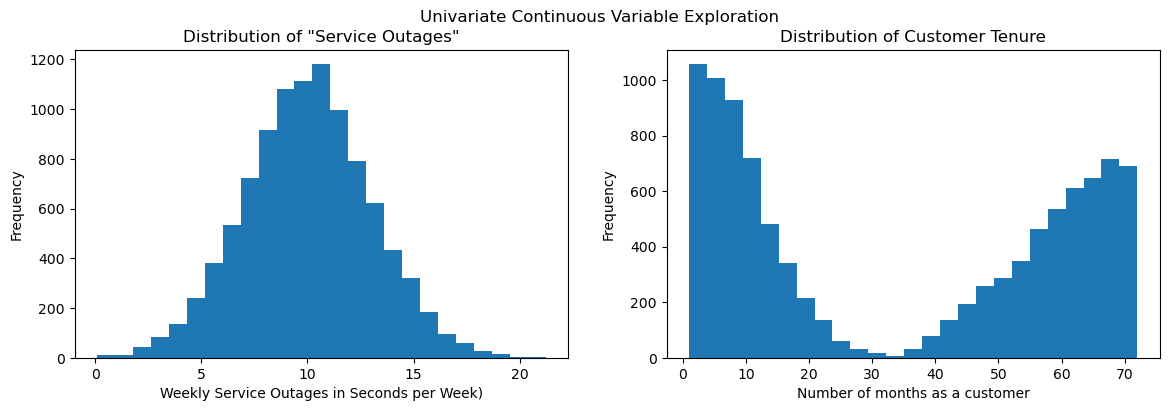

In [191]:
# Determine size and title of visualization
plt.figure(figsize = [14,4])
plt.suptitle("Univariate Continuous Variable Exploration")

# First plot: Univariate exploration of continuous variable: Outage
plt.subplot(1, 2, 1)
plt.title('Distribution of "Service Outages"')
plt.hist(data=df, x="Outage_sec_per_week", bins = 25)
plt.xlabel('Weekly Service Outages in Seconds per Week)')
plt.ylabel("Frequency")

# Second plot: Univariate exploration of continuous variable: Tenure
plt.subplot(1, 2, 2)
plt.title("Distribution of Customer Tenure")
bins = np.arange(0, df["Tenure"].max()+2, 1)
plt.hist(data=df, x = "Tenure", bins=25)
plt.xlabel("Number of months as a customer")
plt.ylabel("Frequency")

In [192]:
# Calculate summary statistics for the Outage_sec_perweek variable
outage_summary = {
    "Mean": df["Outage_sec_per_week"].mean(),
    "Median": df["Outage_sec_per_week"].median(),
    "Standard Deviation": df["Outage_sec_per_week"].std(),
}

# Calculate summary statistics for the Tenure variable
tenure_summary = {
    "Mean": df["Tenure"].mean(),
    "Median": df["Tenure"].median(),
    "Standard Deviation": df["Tenure"].std(),
}

# Create a table to display the summary statistics
table_data = [
    ["Outage", outage_summary["Mean"], outage_summary["Median"], outage_summary["Standard Deviation"]],
    ["Tenure", tenure_summary["Mean"], tenure_summary["Median"], tenure_summary["Standard Deviation"]],
]
table_headers = ["Variable", "Mean", "Median", "Standard Deviation"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

# Display the table
print(table)

+------------+---------+----------+----------------------+
| Variable   |    Mean |   Median |   Standard Deviation |
+============+=========+==========+======================+
| Outage     | 10.0018 |  10.0186 |              2.97602 |
+------------+---------+----------+----------------------+
| Tenure     | 34.5262 |  35.4305 |             26.4431  |
+------------+---------+----------+----------------------+


Text(0, 0.5, 'Number of Customers')

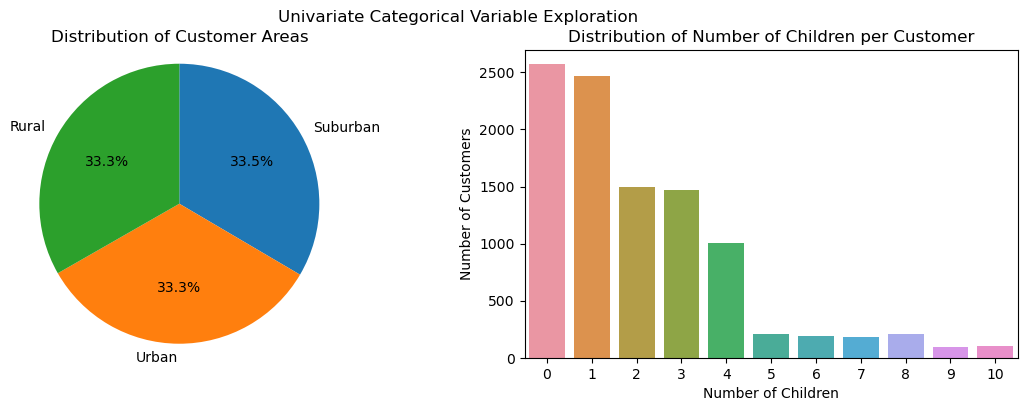

In [193]:
# Determine size and title of visualization
plt.figure(figsize = [14,4])
plt.suptitle("Univariate Categorical Variable Exploration")

# First plot: Univariate exploration of categorical variable: Area
plt.subplot(1, 2, 1)
plt.title("Distribution of Customer Areas")
Area_counts = df["Area"].value_counts()
Area_labels = ["Urban", "Suburban", "Rural"]
plt.pie(Area_counts, labels=Area_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square')

# Second plot: Univariate exploration of categorical variable: Children
plt.subplot(1, 2, 2)
plt.title("Distribution of Number of Children per Customer")
sns.countplot(data=df, x="Children")
plt.xlabel("Number of Children")
plt.ylabel("Number of Customers")

In [194]:
# Calculate frequency counts for Area and Children
area_counts = df["Area"].value_counts()
children_counts = df["Children"].value_counts()

# Display the table of values for Area
print('Area Frequency Counts:')
print(tabulate(area_counts.to_frame().transpose(), headers='keys', tablefmt='psql'))

# Display the table of values for Children
print('\nNumber of Children Frequency Counts:')
print(tabulate(children_counts.to_frame().transpose(), headers='keys', tablefmt='psql'))

Area Frequency Counts:
+------+------------+---------+---------+
|      |   Suburban |   Urban |   Rural |
|------+------------+---------+---------|
| Area |       3346 |    3327 |    3327 |
+------+------------+---------+---------+

Number of Children Frequency Counts:
+----------+------+------+------+------+------+-----+-----+-----+-----+------+-----+
|          |    0 |    1 |    2 |    3 |    4 |   5 |   8 |   6 |   7 |   10 |   9 |
|----------+------+------+------+------+------+-----+-----+-----+-----+------+-----|
| Children | 2570 | 2472 | 1495 | 1472 | 1006 | 212 | 210 | 187 | 185 |   99 |  92 |
+----------+------+------+------+------+------+-----+-----+-----+-----+------+-----+


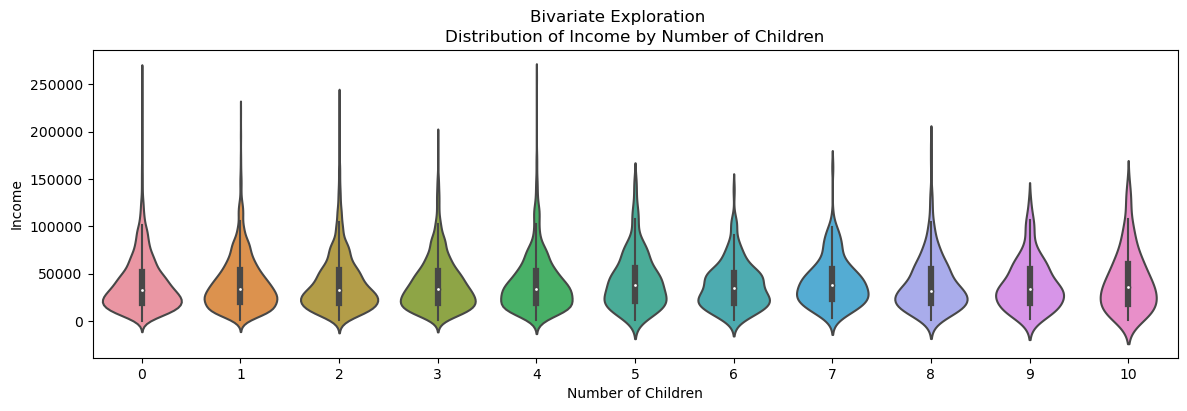

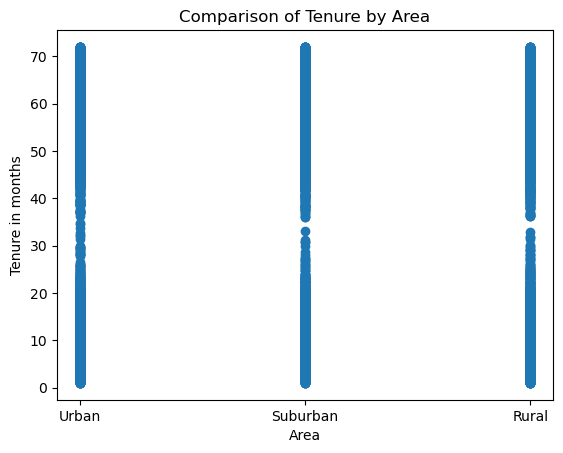

In [195]:
# Determine size and title of visualization
plt.figure(figsize=[14, 4])
plt.suptitle("Bivariate Exploration")

# Create a violin plot for the Bivariate exploration of Income (continuous) and Children (categorical)
sns.violinplot(x='Children', y='Income', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Income')
plt.title('Distribution of Income by Number of Children')
plt.show()

# Create a scatter plot for the Bivariate exploration of Tenure (continuous) and Area (categorical)
plt.scatter(df['Area'], df['Tenure'])
plt.xlabel('Area')
plt.ylabel('Tenure in months')
plt.title('Comparison of Tenure by Area')
plt.show()

In [196]:
# Calculate summary statistics for Income
income_stats = df['Income'].describe()

# Display the table of values for Income
print('Income Summary Statistics:')
print(tabulate(income_stats.to_frame().transpose(), headers='keys', tablefmt='psql'))

# Calculate the counts for each category in the "Children" variable
children_counts = df["Children"].value_counts().reset_index()
children_counts.columns = ["Number of Children", "Count"]

# Display the table of values
print('Children Counts:')
print(tabulate(children_counts, headers='keys', tablefmt='psql'))

Income Summary Statistics:
+--------+---------+---------+---------+--------+---------+---------+---------+--------+
|        |   count |    mean |     std |    min |     25% |     50% |     75% |    max |
|--------+---------+---------+---------+--------+---------+---------+---------+--------|
| Income |   10000 | 39806.9 | 28199.9 | 348.67 | 19224.7 | 33170.6 | 53246.2 | 258901 |
+--------+---------+---------+---------+--------+---------+---------+---------+--------+
Children Counts:
+----+----------------------+---------+
|    |   Number of Children |   Count |
|----+----------------------+---------|
|  0 |                    0 |    2570 |
|  1 |                    1 |    2472 |
|  2 |                    2 |    1495 |
|  3 |                    3 |    1472 |
|  4 |                    4 |    1006 |
|  5 |                    5 |     212 |
|  6 |                    8 |     210 |
|  7 |                    6 |     187 |
|  8 |                    7 |     185 |
|  9 |                   10 |  

In [197]:
# Calculate summary statistics for Tenure
tenure_stats = df['Tenure'].describe()

# Display the table of values for Tenure
print('\nTenure Summary Statistics:')
print(tabulate(tenure_stats.to_frame().transpose(), headers='keys', tablefmt='psql'))

# Calculate the counts for each category in the "Area" variable
area_counts = df["Area"].value_counts().reset_index()
area_counts.columns = ["Area", "Count"]

# Display the table of values
print('Area counts:')
print(tabulate(area_counts, headers='keys', tablefmt='psql'))


Tenure Summary Statistics:
+--------+---------+---------+---------+---------+---------+---------+---------+---------+
|        |   count |    mean |     std |     min |     25% |     50% |     75% |     max |
|--------+---------+---------+---------+---------+---------+---------+---------+---------|
| Tenure |   10000 | 34.5262 | 26.4431 | 1.00026 | 7.91769 | 35.4305 | 61.4798 | 71.9993 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+
Area counts:
+----+----------+---------+
|    | Area     |   Count |
|----+----------+---------|
|  0 | Suburban |    3346 |
|  1 | Urban    |    3327 |
|  2 | Rural    |    3327 |
+----+----------+---------+
